In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
import lightkurve as lk
%matplotlib inline

# Kepler Pixel File analysis using lk database

In [2]:
search_result = lk.search_lightcurve('KIC 8462852', author='Kepler')
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr008462852,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr008462852,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr008462852,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr008462852,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr008462852,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr008462852,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr008462852,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr008462852,0.0
8,Kepler Quarter 08,2011,Kepler,1800,kplr008462852,0.0


In [3]:
# Download pixelfile for a given star

pixelFile = search_targetpixelfile('KIC 8462852', author="Kepler", cadence="long", quarter=15).download()
# A quarter means a quarter of a year
#pixelFile.plot(frame=42)
pixelFile.interact()

1.0828082808280828 d
1373.7137690875038
0.05 d
0.9235245220282627 1 / d


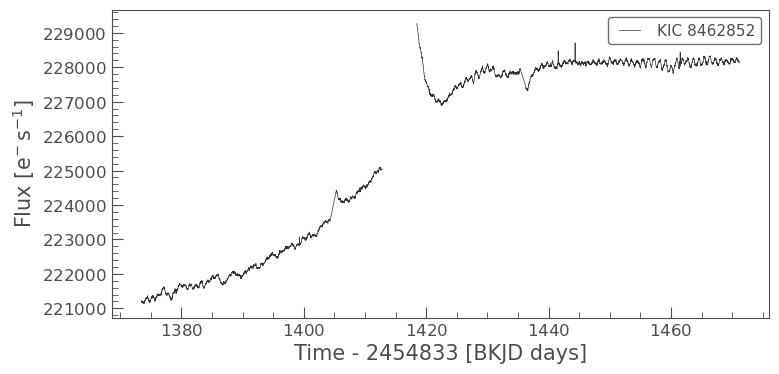

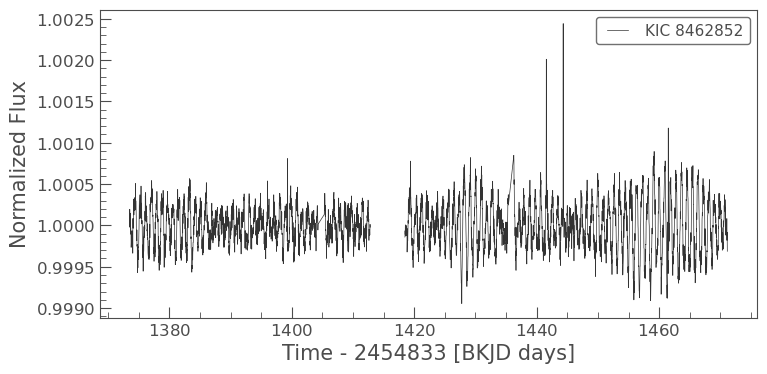

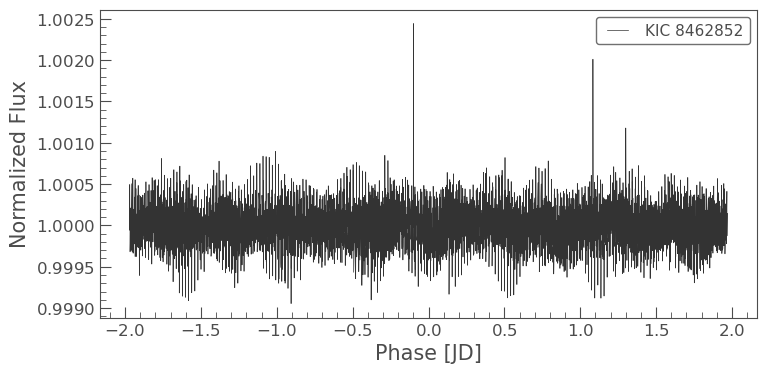

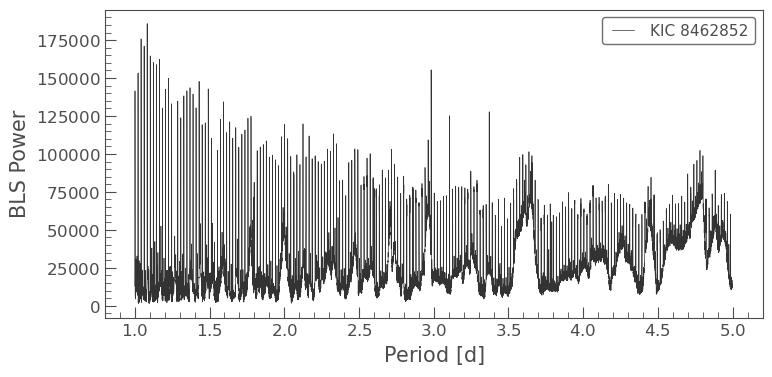

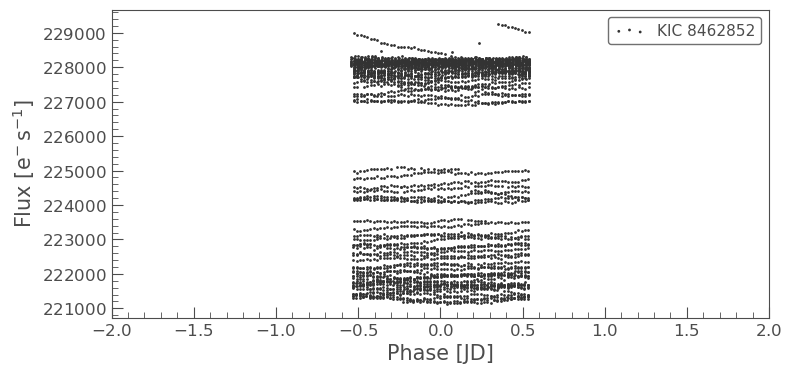

In [8]:
# This is just one frame, we'll combine all frames to make a lightcurve
# Then we apply an aperature mark to make the image look better
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)
lc.plot();

# Flatten the curve to make it easier to spot a pattern

flat_lc = lc.flatten()
flat_lc.plot();

# Phase fold the light curve to verify that period and transit time
# correspond to the transit signal
# This will put the frequency spikes on top of each other if the period is right

folded_lc = flat_lc.fold(period=3.9410941094109413 )
folded_lc.plot();

# How do you find the right period?
# Use a periodogram to show all the repetitive pattern in the graph
# This gives you the most likely candidate
    
# Periodograms are an estimate of the spectral density of a signal 
# (An estimation of what the Fourier Transform of the data would look like
#  if it were a continuous function https://arxiv.org/pdf/1703.09824.pdf)

period = np.linspace(1, 5, 10000)

# BLS = Box Least Square method
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot();

# Period value corresponding to the highest peak in the periodogram
planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power
planet_x_frequency = bls.frequency_at_max_power
# Folding can yield a lot of information about the exoplanet
# The depth can tell you about the size, etc

ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-2,2)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)
print(planet_x_frequency)

# Trying to download/unzip file from MAST:

In [11]:
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

product_group_id = '60917652'
url = 'https://mast.stsci.edu/api/v0.1/Download/bundle.zip?previews=false&obsid=' + product_group_id
destination = '/python - research/exoplanets/'

download_and_unzip(url, destination)

# TESS Pixel File Analysis from local drive:

(-3.0, 3.0)

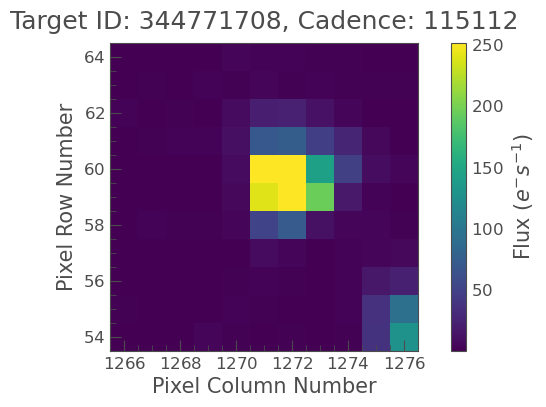

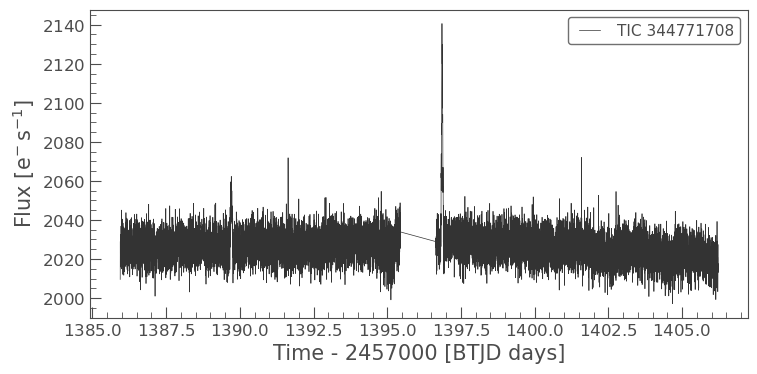

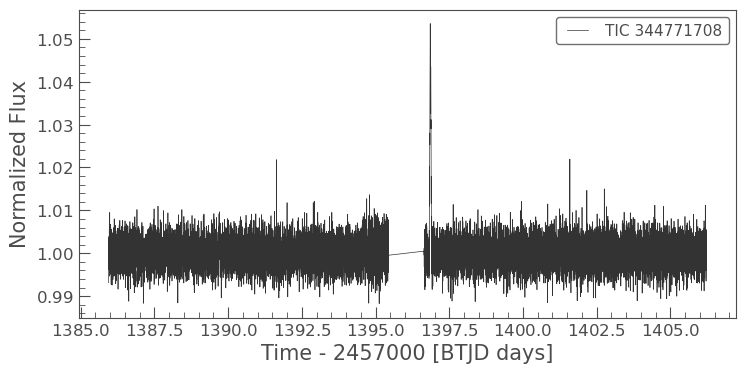

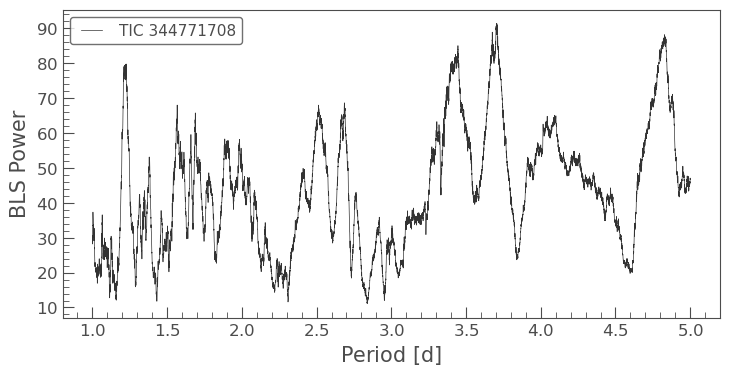

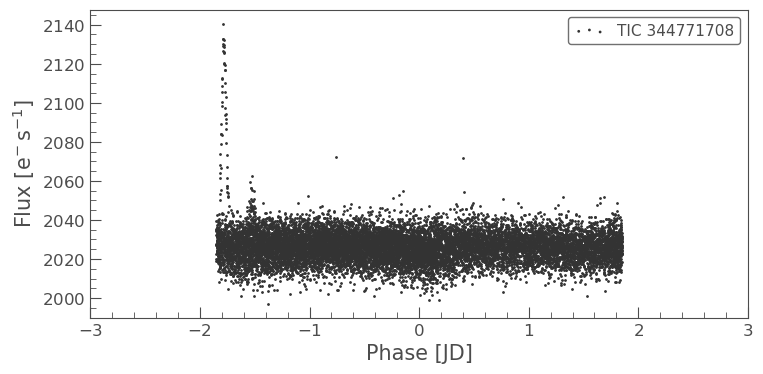

In [13]:
# Let's download the pixelfile for a given star 
# And save it to a local folder (See download helper below)

# Command to search for file - often is not available, so that's why we download more manually
# pixelFile = search_targetpixelfile('KIC 6922244', author="TESS", cadence="long", quarter=4).download()

tpf = TessTargetPixelFile("C:/Users/mihir/python - research/exoplanets/tess2018263035959-s0003-0000000344771708-0123-s_tp.fits") 
# Show a single snapshot 
tpf.plot(frame=1000)

# Plot the lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc.plot()

# Flatten it 
flat_lc = lc.flatten()
flat_lc.plot()

# Try and find the period of the most prominent orbiting object
period = np.linspace(1, 5, 10000)
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power

# Phase-fold the ligthcurve based on the discovered period at max power
ax = lc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-3,3)

# TESS Analysis using lk pipline

In [8]:
lk.search_lightcurve("TIC 424009747")

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 17,2019,QLP,1800,424009747,0.0
1,TESS Sector 57,2022,SPOC,20,424009747,0.0
2,TESS Sector 57,2022,SPOC,120,424009747,0.0
3,TESS Sector 57,2022,TESS-SPOC,200,424009747,0.0
4,TESS Sector 57,2022,QLP,200,424009747,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

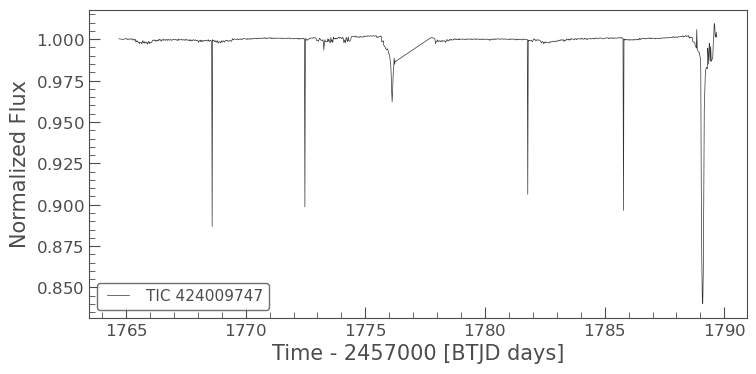

In [9]:
tlc = lk.search_lightcurve("TIC 424009747", cadence='long', sector='17').download()
tlc.plot()

4.101510151015102 d
1768.593107250905
0.05 d
0.24381263563434197 1 / d


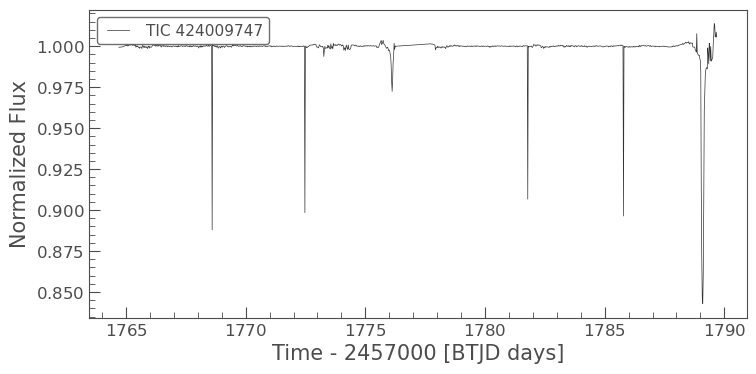

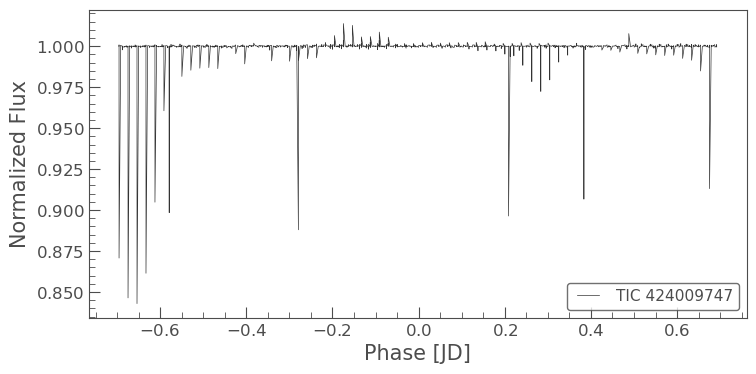

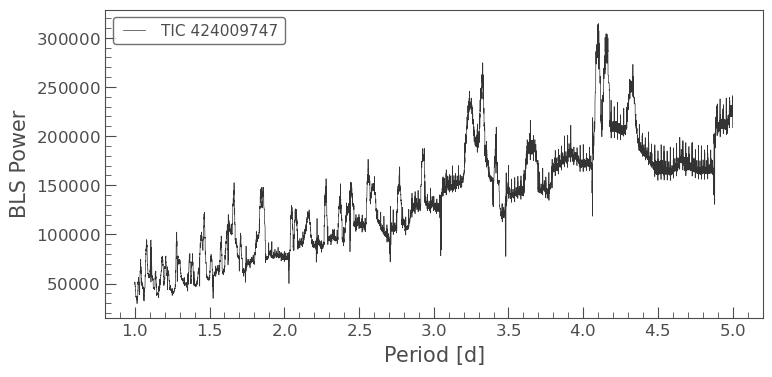

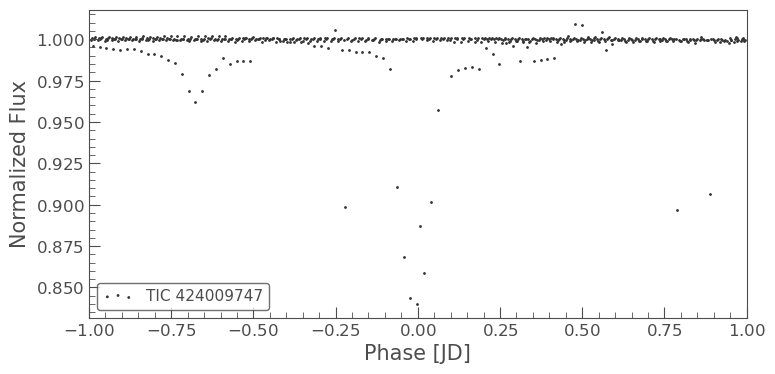

In [10]:
flat_tlc = tlc.flatten()
flat_tlc.plot();

folded_tlc = flat_tlc.fold(period = 1.3916391639163916)
folded_tlc.plot();

period = np.linspace(1, 5, 10000)
bls = tlc.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot();

planet_x_period = bls.period_at_max_power
planet_x_t0 = bls.transit_time_at_max_power
planet_x_dur = bls.duration_at_max_power
planet_x_freq = bls.frequency_at_max_power

ax = tlc.fold(period=planet_x_period, epoch_time=planet_x_t0).scatter()
ax.set_xlim(-1,1)

print(planet_x_period)
print(planet_x_t0)
print(planet_x_dur)
print(planet_x_freq)